In [1]:
import torch
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#this has 10 test images and 90 train images of fox
# pose - postion - 16 values(4 x 4 matrix)
#c2value ( so we take only 3 values)

# so we have the postion for the test of the training data
# intrinsics of a matrix - focal length and principal point for the x and y of the axis
#  

In [3]:
# we have assumed that pinhole camera is at the center
# - w/2 and - h/2 so 200 x 200 pixels gives 100-100 point(center of the image)


In [4]:
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    # print(len(pos_file_naemes))
    # print(len(intrinsics_file_names))
    # print(len(img_file_names))

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        #poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        print(pose)
        
        #intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        #intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
    
# we have now listed all the files

In [6]:
get_rays('fox')

['-0.2242438942193985', '0.39468586444854736', '-0.8910318613052368', '-8.910330772399902', '-0.9745330810546875', '-0.09081876277923584', '0.2050299346446991', '2.050246238708496', '0.0', '0.914316713809967', '0.4049999713897705', '4.050000190734863', '0.0', '0.0', '0.0', '1.0']
['0.4565734565258026', '0.5026724338531494', '-0.7340716123580933', '-7.3407206535339355', '-0.8896857500076294', '0.25796398520469666', '-0.3767145872116089', '-3.767136573791504', '0.0', '0.8250908851623535', '0.5649999976158142', '5.650000095367432', '0.0', '0.0', '0.0', '1.0']
['0.9952706098556519', '0.02477094903588295', '-0.09392958879470825', '-0.9392927885055542', '-0.09714096784591675', '0.2537940442562103', '-0.9623680114746094', '-9.62368106842041', '0.0', '0.9669410586357117', '0.2550000250339508', '2.549999952316284', '0.0', '0.0', '0.0', '1.0']
['-0.9984341263771057', '-0.004754930268973112', '0.0557379424571991', '0.5573284029960632', '0.05594039335846901', '-0.08486684411764145', '0.99482071399

In [7]:
# so here pose values as 16 values as string we need to convert to numpy array
# so that we get it as 4x4 matrix
#so we use reshape
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    # print(len(pos_file_naemes))
    # print(len(intrinsics_file_names))
    # print(len(img_file_names))

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        print(poses[i])
        break
        #intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        #intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
    
# we have now listed all the files


In [8]:
get_rays('fox')

[[-0.22424389  0.39468586 -0.89103186 -8.91033077]
 [-0.97453308 -0.09081876  0.20502993  2.05024624]
 [ 0.          0.91431671  0.40499997  4.05000019]
 [ 0.          0.          0.          1.        ]]


In [9]:
# so here pose values as 16 values as string we need to convert to numpy array
# so that we get it as 4x4 matrix
#so we use reshape
def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)

        intrinsic = open(datapath + '/train/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)

        #read images
        name = img_file_names[i]
        img  = imageio.imread(datapath + '/imgs/' + name)
        
        print(img.shape)
        print(img)
        print(img.max())
        break
    
# we have now listed all the files


In [10]:
get_rays('fox')

/var/folders/j3/17rd2pgs2659mkjph543tbq40000gq/T/ipykernel_29223/2215714379.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(datapath + '/imgs/' + name)


(400, 400, 4)
[[[0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [1 1 1 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[1 1 1 0]
  [1 1 1 0]
  [1 1 1 0]
  ...
  [1 1 1 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[1 1 1 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [1 1 1 0]]

 [[0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [1 1 1 0]
  [0 0 0 0]]]
255


In [11]:
# So here we can see that the images are of 4 channels and the max value is 255
# so we need to divide by 255 to get the values between 0 and 1

def get_rays(datapath):
    
    pos_file_names = os.listdir(datapath + '/train/pose')
    intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')
    img_file_names =[f for f in os.listdir(datapath + '/imgs') if 'train' in f]

    assert len(pos_file_names) == len(intrinsics_file_names)
    assert len(img_file_names) == len(pos_file_names)

    # Read
    N = len(pos_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pos_file_names[i]
        
        pose = open(datapath + '/train/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)

        intrinsic = open(datapath + '/train/intrinsics/' + name).read().split() 
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)

        #read images    
        name = img_file_names[i]
        img  = imageio.imread(datapath + '/imgs/' + name) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    print(images.shape)    

In [12]:
get_rays('fox')

/var/folders/j3/17rd2pgs2659mkjph543tbq40000gq/T/ipykernel_29223/1226821465.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img  = imageio.imread(datapath + '/imgs/' + name) / 255.


(90, 400, 400, 4)


In [13]:
#here the output we got is (90, 400, 400, 4)
#so we have 90 images of 400x400 and 4 channels
#where 90 is the number of images
# 400 is the height and 400 is the width

In [14]:
def get_rays(datapath, mode='train'):
    
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1] #height = 400
    W = images.shape[2] #width = 400 
    
    if images.shape[3] == 4: #RGBA -> RGB (so last dimension is alpha) we do blending
        #ie alpha blending to get RGB (alpha is the last dimension and opacity)
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])
        #so basically we take the RGB channel and multiply it with the alpha channel
        #(1 - images[..., -1:]) we do regularization ie we take the alpha channel and subtract it from 1
        #and then we add it to the RGB channel
        #this is done because black is 0 and white is 1 in the alpha channel

    plt.imshow(images[1])
    plt.show()

    print(images.shape)
    print(images.max())



    # rays_o = np.zeros((N, H*W, 3))
    # rays_d = np.zeros((N, H*W, 3))
    # target_px_values = images.reshape((N, H*W, 3))
    
    # for i in range(N):
        
    #     c2w = poses[i]
    #     f = intrinsics[i, 0, 0]

    #     u = np.arange(W)
    #     v = np.arange(H)
    #     u, v = np.meshgrid(u, v)
    #     dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
    #     dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
    #     dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
    #     rays_d[i] = dirs.reshape(-1, 3)
    #     rays_o[i] += c2w[:3, 3]

    # return rays_o, rays_d, target_px_values


/var/folders/j3/17rd2pgs2659mkjph543tbq40000gq/T/ipykernel_29223/2410552428.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.


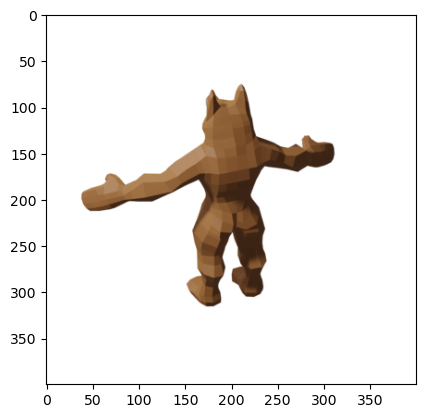

(90, 400, 400, 3)
1.0


In [15]:
get_rays('fox')

In [16]:
# Now we start generating the rays for the dataset so that we have same format as pose and intrinsics
def get_rays(datapath, mode='train'):
    
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1] #height = 400
    W = images.shape[2] #width = 400 
    
    if images.shape[3] == 4:
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])
    
    # this is for N dimensional array
    rays_o = np.zeros((N, H*W, 3))
    rays_d = np.zeros((N, H*W, 3))
    target_px_values = images.reshape((N, H*W, 3))
    
    for i in range(N):
        
        c2w = poses[i]
        f = intrinsics[i, 0, 0]

        u = np.arange(W)
        v = np.arange(H)
        u, v = np.meshgrid(u, v)
        dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
        dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
        dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
        rays_d[i] = dirs.reshape(-1, 3)
        rays_o[i] += c2w[:3, 3]

    return rays_o, rays_d, target_px_values


In [17]:
o, d, t = get_rays('fox')
#here o - origin, d - direction, t - target pixel values
# we will concatenate these arrays later for training

/var/folders/j3/17rd2pgs2659mkjph543tbq40000gq/T/ipykernel_29223/3488727330.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.


In [18]:
o[1]

array([[-7.34072065, -3.76713657,  5.6500001 ],
       [-7.34072065, -3.76713657,  5.6500001 ],
       [-7.34072065, -3.76713657,  5.6500001 ],
       ...,
       [-7.34072065, -3.76713657,  5.6500001 ],
       [-7.34072065, -3.76713657,  5.6500001 ],
       [-7.34072065, -3.76713657,  5.6500001 ]])

In [19]:
d[1]

array([[ 0.72485664,  0.5369144 , -0.43163152],
       [ 0.72526951,  0.53631926, -0.43167788],
       [ 0.72568208,  0.53572371, -0.43172402],
       ...,
       [ 0.71099619,  0.20234819, -0.67345351],
       [ 0.71125563,  0.20167372, -0.67338186],
       [ 0.71151465,  0.20099928, -0.67330988]])

In [20]:
t[1]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [21]:
batch_size = 1024
o, d, t = get_rays('fox', mode='train')
dataloader = DataLoader(torch.cat((torch.from_numpy(o),
                                    torch.from_numpy(d),
                                     torch.from_numpy(t)), dim=1), batch_size=batch_size, shuffle=True)


test_o, test_d, test_t = get_rays('fox', mode='test')

/var/folders/j3/17rd2pgs2659mkjph543tbq40000gq/T/ipykernel_29223/3488727330.py:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.


In [22]:
!"C:\Program Files\Git\bin\bash.exe" -c ls fox/train/pose

zsh:1: command not found: C:\Program Files\Git\bin\bash.exe


In [23]:
#  Camera / Dataset -loading the data set on generating arrays.

def get_rays(datapath, mode='train'):
    
    """
    Get rays from the directory datapath, mode can be 'train' or 'test'
    
    Parameters
    ----------
    datapath : str
        The root directory of the dataset
    mode : str
        The mode of the dataset, can be 'train' or 'test'
    
    Returns
    -------
    rays_o : torch.tensor
        The origin of the rays
    rays_d : torch.tensor
        The direction of the rays
    target_px_values : torch.tensor
        The RGB values of the target pixels
    """
    # listdir - list the files in the directory
    # endswith - check if the file ends with .txt


    # here we are reading the files or the data of pose and intrinsics
    # here we use the library os to read the files from the directory 

    # pos_file_naemes = os.listdir(datapath + '/train/pose')
    # intrinsics_file_names = os.listdir(datapath + '/train/intrinsics')

    #asserts - check if the condition is true
    # ie in our case if the length of the pose file names is equal to the length of the intrinsics file names
    # and if the length of the image file names is equal to the length of the pose file names

    #image_file_names = [f for f in os.listdir(datapath + '/imgs') if 'train' in f]
    #here we iterate in the image file names and check if the mode is train
    # because we have both train and test data sets in the imgs folder
    
    #here we are iterating to remove any file that is not a text file
    # for both pose and intrinsics ( not needed actually )
    pose_file_names = [f for f in os.listdir(datapath + f'/{mode}/pose') if f.endswith('.txt')]
    intrisics_file_names = [f for f in os.listdir(datapath + f'/{mode}/intrinsics') if f.endswith('.txt')]
    img_file_names = [f for f in os.listdir(datapath + '/imgs') if mode in f]

    #here mode is for train or test
    

    assert len(pose_file_names) == len(intrisics_file_names)
    assert len(img_file_names) == len(pose_file_names)
    
    # Read
    N = len(pose_file_names)
    poses = np.zeros((N, 4, 4))
    intrinsics = np.zeros((N, 4, 4))
    
    images = []
    
    for i in range(N):
        name = pose_file_names[i]
        
        pose = open(datapath + f'/{mode}/pose/' + name).read().split()
        poses[i] = np.array(pose, dtype=float).reshape(4, 4)
        
        intrinsic = open(datapath + f'/{mode}/intrinsics/' + name).read().split()
        intrinsics[i] = np.array(intrinsic, dtype=float).reshape(4, 4)
        
        # Read images
        img = imageio.imread(datapath + '/imgs/' + name.replace('txt', 'png')) / 255.
        images.append(img[None, ...])
    images = np.concatenate(images)
    
    H = images.shape[1]
    W = images.shape[2]
    
    if images.shape[3] == 4: #RGBA -> RGB
        images = images[..., :3] * images[..., -1:] + (1 - images[..., -1:])

    rays_o = np.zeros((N, H*W, 3))
    rays_d = np.zeros((N, H*W, 3))
    target_px_values = images.reshape((N, H*W, 3))
    
    for i in range(N):
        
        c2w = poses[i]
        f = intrinsics[i, 0, 0]

        u = np.arange(W)
        v = np.arange(H)
        u, v = np.meshgrid(u, v)
        dirs = np.stack((u - W / 2, -(v - H / 2), - np.ones_like(u) * f), axis=-1)
        dirs = (c2w[:3, :3] @ dirs[..., None]).squeeze(-1)
        dirs = dirs / np.linalg.norm(dirs, axis=-1, keepdims=True)
        
        rays_d[i] = dirs.reshape(-1, 3)
        rays_o[i] += c2w[:3, 3]

    return rays_o, rays_d, target_px_values


In [24]:
# Rendering